

from1. Implemente o Diagrama de Classes a seguir, utilizando sempre que possível o super.

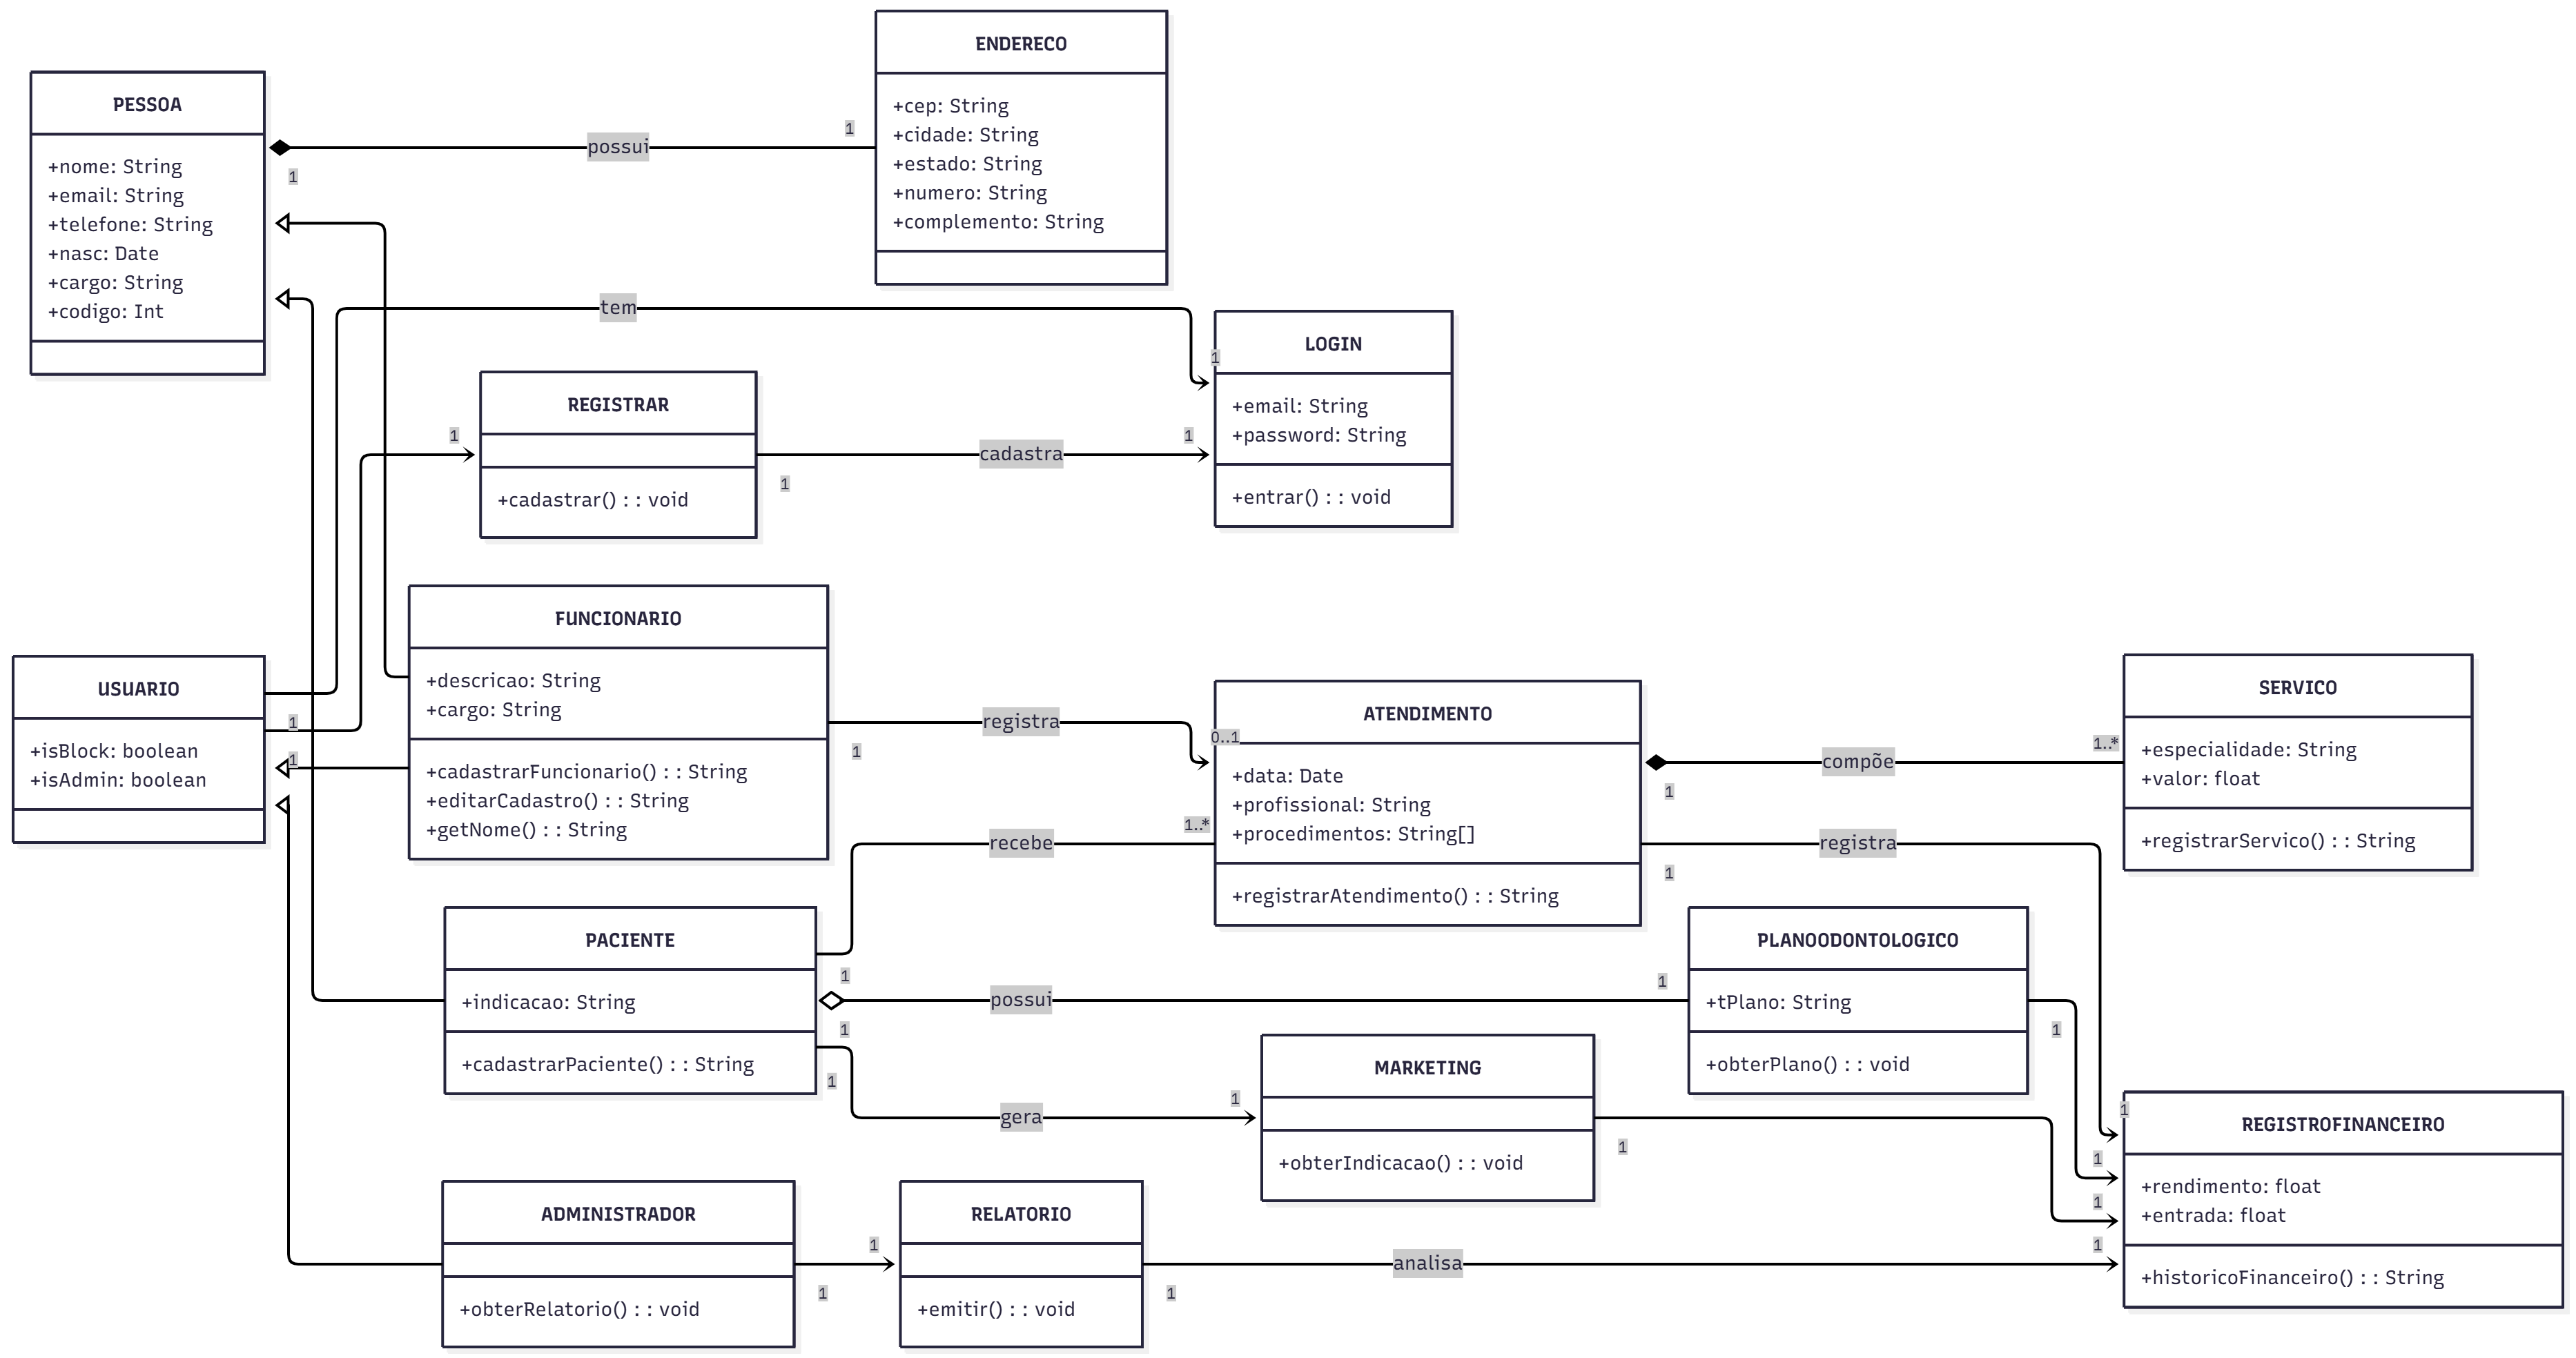

In [11]:
from datetime import date
from typing import List, Optional


class Endereco:
    def __init__(self, cep: str, cidade: str, estado: str, numero: str, complemento: str):
        self.cep = cep
        self.cidade = cidade
        self.estado = estado
        self.numero = numero
        self.complemento = complemento


class Pessoa:
    def __init__(self, nome: str, email: str, telefone: str, nasc: date, cargo: str, codigo: int, endereco: Endereco):
        self.nome = nome
        self.email = email
        self.telefone = telefone
        self.nasc = nasc
        self.cargo = cargo
        self.codigo = codigo
        self.endereco = endereco


class Funcionario(Pessoa):
    def __init__(self, nome: str, email: str, telefone: str, nasc: date, cargo: str, codigo: int, endereco: Endereco, descricao: str):
        super().__init__(nome, email, telefone, nasc, cargo, codigo, endereco)
        self.descricao = descricao

    def cadastrar_funcionario(self, nome: str, email: str, telefone: str, nasc: date, cargo: str, codigo: int, endereco: Endereco, descricao: str) -> 'Funcionario':
        funcionario = Funcionario(nome, email, telefone, nasc, cargo, codigo, endereco, descricao)
        return funcionario

    def editar_cadastro(self, nome: str, email: str, telefone: str, nasc: date, cargo: str, codigo: int, endereco: Endereco, descricao: str) -> None:
        self.nome = nome
        self.email = email
        self.telefone = telefone
        self.nasc = nasc
        self.cargo = cargo
        self.codigo = codigo
        self.endereco = endereco
        self.descricao = descricao

    def get_nome(self) -> str:
        return self.nome


class Paciente(Pessoa):
    def __init__(self, nome: str, email: str, telefone: str, nasc: date, cargo: str, codigo: int, endereco: Endereco):
        super().__init__(nome, email, telefone, nasc, cargo, codigo, endereco)
        self.indicador: Optional[Pessoa] = None

    def indicacao(self, pessoa_indicadora: Pessoa) -> Pessoa:
        self.indicador = pessoa_indicadora
        return self.indicador

    def cadastrar_paciente(self, nome: str, email: str, telefone: str, nasc: date, cargo: str, codigo: int, endereco: Endereco) -> 'Paciente':
        paciente = Paciente(nome, email, telefone, nasc, cargo, codigo, endereco)
        return paciente


class Login:
    def __init__(self, email: str, password: str):
        self.email = email
        self.password = password

    def login(self, email: str, password: str) -> bool:
        return self.email == email and self.password == password


class Usuario:
    def __init__(self, blocked: bool, admin: bool, login: Login):
        self.blocked = blocked
        self.admin = admin
        self.login = login


class Registrar:
    def __init__(self):
        self.usuarios_cadastrados: List[Usuario] = []

    def cadastrar_usuario(self, admin_usuario: Usuario, novo_usuario_login: Login, blocked: bool = False, admin: bool = False) -> Optional[Usuario]:
        if admin_usuario.admin:
            novo_usuario = Usuario(blocked=blocked, admin=admin, login=novo_usuario_login)
            self.usuarios_cadastrados.append(novo_usuario)
            print(f"Usuário {novo_usuario_login.email} cadastrado com sucesso por {admin_usuario.login.email}.")
            return novo_usuario
        else:
            print("Permissão negada: Somente administradores podem cadastrar novos usuários.")
            return None


class Admin:
    def obter_relatorio(self, usuario: Usuario) -> str:
        if usuario.admin:
            return "Conteúdo do relatório: Dados confidenciais de administrador."
        else:
            return "Permissão negada: Você não tem privilégios de administrador para obter este relatório."


class Relatorio:
    def emitir(self, admin_usuario: Usuario) -> str:
        if admin_usuario.admin:
            return "Relatório gerado com sucesso."
        else:
            return "Permissão negada: Você não tem privilégios de administrador para emitir este relatório."


class Atendimento:
    def __init__(self, data: date, profissional: Funcionario, procedimentos: List[str]):
        if profissional.cargo.lower() != "profissional":
            raise ValueError("O profissional deve ter o cargo 'profissional'.")
        self.data = data
        self.profissional = profissional
        self.procedimentos = procedimentos


class Servico:
    def __init__(self, especialidade: str, valor: float, atendimento: Atendimento):
        self.especialidade = especialidade
        self.valor = valor
        self.atendimento = atendimento

    def registrar_servico(self, especialidade: str, valor: float, atendimento: Atendimento) -> 'Servico':
        novo_servico = Servico(especialidade, valor, atendimento)
        return novo_servico


class Marketing:
    def obter_indicacao(self, paciente: Paciente) -> Optional[Pessoa]:
        return paciente.indicador


class RegistroFinanceiro:
    def __init__(self, rendimento: float = 0.0, entrada: float = 0.0):
        self.rendimento = rendimento
        self.entrada = entrada
        self.historico: List[dict] = []

    def registrar_transacao(self, valor: float, tipo: str, origem: str, detalhes: str) -> None:
        if tipo.lower() == 'entrada':
            self.entrada += valor
            self.rendimento += valor
        elif tipo.lower() == 'saida':
            self.rendimento -= valor

        self.historico.append({
            "data": date.today(),
            "valor": valor,
            "tipo": tipo.lower(),
            "origem": origem,
            "detalhes": detalhes
        })
        print(f"Transação {tipo.upper()} de R${valor:.2f} registrada. Origem: {origem}")

    def historico_financeiro(self) -> List[dict]:
        return self.historico

2. Em Python, a herança múltipla é totalmente suportada, mas exige atenção especial para evitar ambiguidades e garantir a ordem correta de inicialização.

Justifique o Design: Explique, no contexto de uma universidade, por que o design atual, que força a herança múltipla para a classe ProfessorAssistenteGraduado, é necessário e faz sentido (i.e., por que um P.A.G. precisa ser ambas as coisas ao mesmo tempo).

Problema e Solução em Python:

Identifique o Risco: Qual é o principal problema ou ambiguidade que essa herança múltipla pode gerar se os métodos de inicialização (__init__) não forem escritos corretamente? (Reflita sobre os métodos que se repetem ou vêm da classe base Pessoa).

Solução em Código: Reescreva as quatro classes (Pessoa, Estudante, Professor, e ProfessorAssistenteGraduado) em Python, demonstrando como você usaria a função super() de forma correta e explícita para garantir que:

A ordem de inicialização seja garantida (seguindo o MRO - Method Resolution Order).

Os construtores de todas as classes-pai sejam chamados corretamente, incluindo a classe Pessoa, que é a ancestral comum.

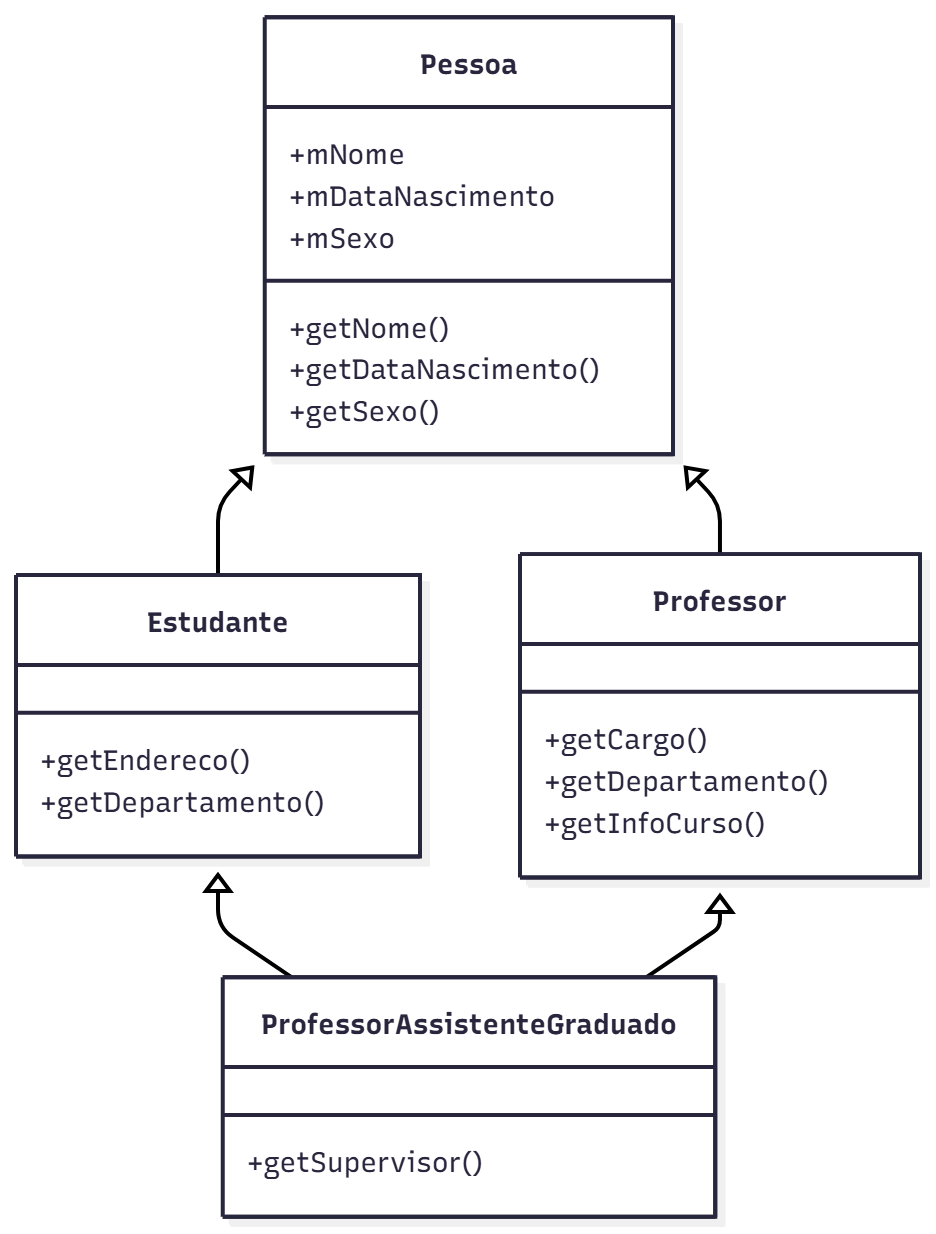

In [ ]:
from logging import setLogRecordFactory
from datetime import datetime, date
from typing import Optional


class Estudante():
    def __init__(self, nome: str, dataNascimento: date, sexo: str, endereco: str, departamento: str):
        self.nome = nome
        self.dataNascimento = dataNascimento
        self.sexo = sexo
        self._endereco = endereco
        self._departamento = departamento

    def getEndereco(self) -> str:
      return self._endereco

    def getDepartamento(self) -> str:
      return self._departamento

class Professor():
    def __init__(self, nome: str, dataNascimento: date, sexo: str, cargo: str, departamento: str, info_curso: str):
        self.nome = nome
        self.dataNascimento = dataNascimento
        self.sexo = sexo
        self._cargo = cargo
        self._departamento = departamento
        self._info_curso = info_curso

    def getCargo(self) -> str:
      return self._cargo

    def getDepartamento(self) -> str:
      return self._departamento

    def getInfoCursos(self) -> str:
      return self._info_curso

class ProfessorAssistenteGraduado(Professor, Estudante):
    def __init__(self, nome: str, dataNascimento: date, sexo: str,
                 endereco: str, departamento: str, cargo: str, info_curso: str,
                 supervisor: Optional[Professor] = None):

        Estudante.__init__(self, nome, dataNascimento, sexo, endereco, departamento)

        Professor.__init__(self, nome, dataNascimento, sexo, cargo, departamento, info_curso)

        self._supervisor = supervisor

    def getSupervisor(self) -> Optional[Professor]:
      return self._supervisor